Optimal Threshold (F1): 0.37373737373737376


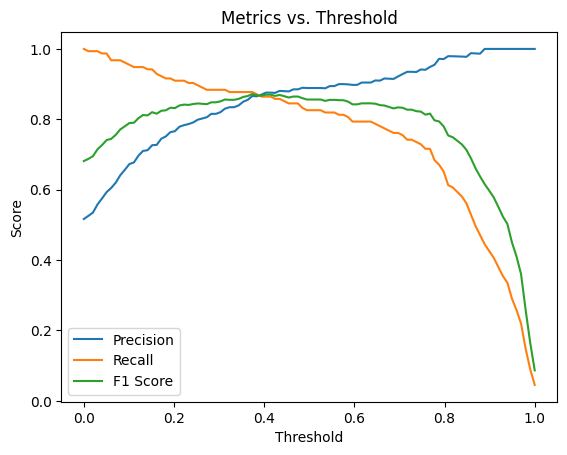

In [1]:
from exo_toolkit import *
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Evaluate thresholds
metrics = evaluate_thresholds(y_test, y_probs)

# Find optimal threshold
optimal_threshold = find_optimal_threshold(metrics, metric="f1")
print(f"Optimal Threshold (F1): {optimal_threshold}")

# Plot metrics
plot_metrics(metrics)

# Final predictions using optimal threshold
y_final_pred = (y_probs >= optimal_threshold).astype(int)
